## 1 数据读取

搜狐中文新闻数据存放在 ***train_sample_utf8.csv*** 和 ***test_sample_utf8.csv*** 两个文件中，在后面的分析中我们分别当做训练集和测试集来使用。我们首先使用 `Pandas` 中的 `read_csv` 函数读取。

In [1]:
import pandas as pd
%matplotlib inline
raw_train = pd.read_csv("./input/train_sample_utf8.csv",encoding="utf8")
raw_test = pd.read_csv("./input/test_sample_utf8.csv",encoding="utf8")

查看两个文件的前五行数据。

In [2]:
raw_train.head(5)

,分类,文章,字数
0,科技,“一路听天下”开拓“无聊经济” 在纳斯达克风光上市的分众传媒，得到国际五大风险投资商青睐的炎...,1954
1,旅游,中国赴美旅游首发团６月１７日启程 报价两万左右 六月初的一天，来自深圳的中国旅游团游客纷纷拿...,1177
2,新闻,科学家教育家蒙特梭利：给孩子爱与自由（图） 蒙特梭利和“儿童之家”的孩子们在一起我们的孩子想...,4571
3,教育,７名大学生作出“震后恢复建议” 获国务院肯定 大学生灾后重建报告获国务院肯定作出４万字建议案...,2288
4,教育,最牛高考生：重庆学生称“押中”今年作文题 最牛鼓劲：数学考试前百余考生吼“雄起”“雄起！雄起...,1838


In [3]:
raw_test.head(5)

,分类,文章
0,娱乐,影片《奥林匹亚》 影片《奥林匹亚》影片《奥林匹亚》剧情简介本片如英雄史诗般的奥运纪录片是德国...
1,女人,盘点男人出轨都会经历的五个过程 大凡男人都有背叛老婆的野心，或精神的背叛，或身体的背叛，又或...
2,文化,欧阳奋强点评新宝玉：他应该能够超越我（图） 来源：中国网四川新闻网－成都商报讯本报讯 （记者...
3,体育,法国意大利双雄渐现堕落 欧洲杯让世界杯见鬼去 来源：搜狐体育失望的亨利焦点人物新“三剑客 ”...
4,房地产,业内论坛 版主： 毕普 ｔａｌｋａｔｉｖｅ 也是另类 华沉思 周海山 成业 醋咪 ｚｈａｍｕ...


In [4]:
raw_train.shape

(5521, 3)

In [5]:
raw_test.shape

(3111, 2)

可见，训练集包含 5521 条新闻，测试集中包含 3111 条新闻。那么，训练集和测试集中，不同主题的新闻分布如何？我们可以借助 `DataFrame` 某列的 `value_counts` 方法完成统计。然后使用 `plot` 函数进行可视化显示。

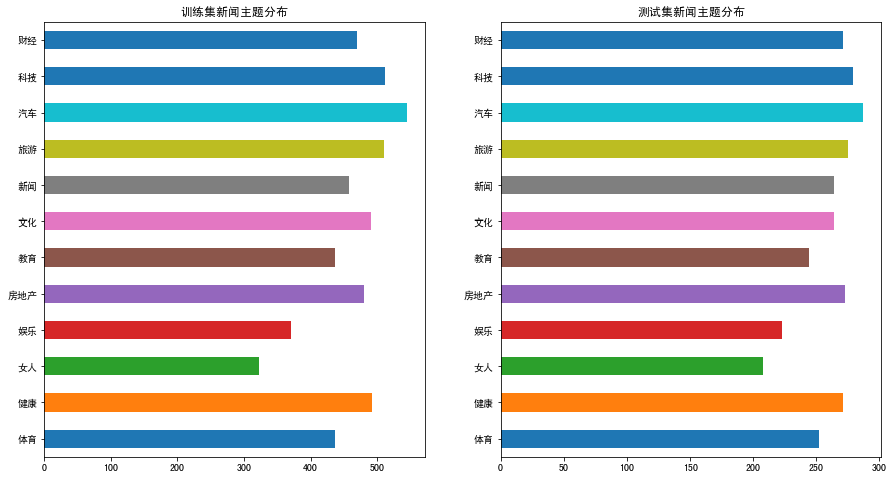

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
raw_train["分类"].value_counts().sort_index().plot(kind="barh",title='训练集新闻主题分布')
plt.subplot(1, 2, 2)
raw_test["分类"].value_counts().sort_index().plot(kind="barh",title='测试集新闻主题分布')

一共包含 12 种主题的新闻，无论是在训练集还是测试集，各个主题的新闻分布较均衡。

## 2 对新闻内容进行分词

由于新闻为中文，再进一步进行处理之前，我们需要先对新闻内容进行分词。简单来说，分词就是将连在一起的新闻内容中的词进行分割。这里我们使用 Python 中一个著名的中文分析器 `jieba` 完成这项任务。为了后续方便，我们封装一个 `news_cut` 函数，它接受的输入为新闻内容，输出为分词后的结果。分词后，词与词之间使用空格进行分隔。

In [8]:
import jieba
def news_cut(text):
    return " ".join(list(jieba.cut(text)))
#简单测试下分词效果
test_content = "六月初的一天，来自深圳的中国旅游团游客纷纷拿起相机拍摄新奇刺激的好莱坞环球影城主题公园场景。"
print(news_cut(test_content))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.756 seconds.
Prefix dict has been built succesfully.


六月 初 的 一天 ， 来自 深圳 的 中国 旅游团 游客 纷纷 拿 起 相机 拍摄 新奇 刺激 的 好莱坞 环球 影城 主题公园 场景 。


现在利用封装的分词函数，对训练集和测试集中的新闻内容进行分词处理，分词结果保存到对应 DataFrame 对象的 ”分词文章“ 一列。这里我们使用了 `Pandas` 中的 `Series` 对象的 `map` 函数。它能够接受一个函数，对 `Series` 中的每一个元素作为该函数的输入，然后将函数的输出返回。

In [9]:
raw_train["分词文章"] = raw_train["文章"].map(news_cut)
raw_test["分词文章"] = raw_test["文章"].map(news_cut)

In [10]:
raw_test.head(5)

,分类,文章,分词文章
0,娱乐,影片《奥林匹亚》 影片《奥林匹亚》影片《奥林匹亚》剧情简介本片如英雄史诗般的奥运纪录片是德国...,影片 《 奥林匹亚 》 影片 《 奥林匹亚 》 影片 《 奥林匹亚 》 剧情简介 本片 ...
1,女人,盘点男人出轨都会经历的五个过程 大凡男人都有背叛老婆的野心，或精神的背叛，或身体的背叛，又或...,盘点 男人 出轨 都 会 经历 的 五个 过程 大凡 男人 都 有 背叛 老婆 的 野心...
2,文化,欧阳奋强点评新宝玉：他应该能够超越我（图） 来源：中国网四川新闻网－成都商报讯本报讯 （记者...,欧阳奋强 点评 新 宝玉 ： 他 应该 能够 超越 我 （ 图 ） 来源 ： 中国 网 ...
3,体育,法国意大利双雄渐现堕落 欧洲杯让世界杯见鬼去 来源：搜狐体育失望的亨利焦点人物新“三剑客 ”...,法国 意大利 双雄 渐现 堕落 欧洲杯 让 世界杯 见鬼 去 来源 ： 搜狐 体育 ...
4,房地产,业内论坛 版主： 毕普 ｔａｌｋａｔｉｖｅ 也是另类 华沉思 周海山 成业 醋咪 ｚｈａｍｕ...,业内 论坛 版主 ： 毕普 ｔ ａ ｌ ｋ ａ ｔ ｉ ｖ ｅ 也 是 另类...


## 3 将新闻表示为向量

In [11]:
#加载停用词
stop_words = []
file = open("./input/stopwords.txt") 
for line in file:
    stop_words.append(line.strip())
file.close()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words)
X_train = vectorizer.fit_transform(raw_train["分词文章"])
X_test = vectorizer.transform(raw_test["分词文章"])

## 4 构建 KNN 分类器

使用 `sklearn` 中 `neighbors` 模块的 `KNeighborsClassifier` 类构建一个 KNN 分类器。我们将邻居数 `n_neighbors` 设置为 5 。使用邻居的标签进行投票时，用预测样本与邻居样本的距离的倒数作为权重。然后使用 `fit` 方法，在训练集中训练模型。 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights="distance")
knn.fit(X_train, raw_train["分类"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

## 5 测试集新闻主题预测

模型训练完成后，可以使用 `predict` 方法对测试集中的样本进行预测，得到预测标签列表 `Y_test` 。

In [14]:
Y_test = knn.predict(X_test)

## 6 新闻主题分类效果进行评估

下面使用混淆矩阵来分析模型在测试样本上的表现。混淆矩阵从样本的真实标签和模型预测标签两个维度对测试集样本进行分组统计，然后以矩阵的形式展示。借助混淆矩阵可以很好地分析模型在每一类样本上的分类效果。为了更直观地分析，我们借助 Python 中可视化包 `seaborn` 提供的 `heatmap` 函数，将混淆矩阵可视化。

Text(0.5, 1.0, '混淆矩阵热力图')

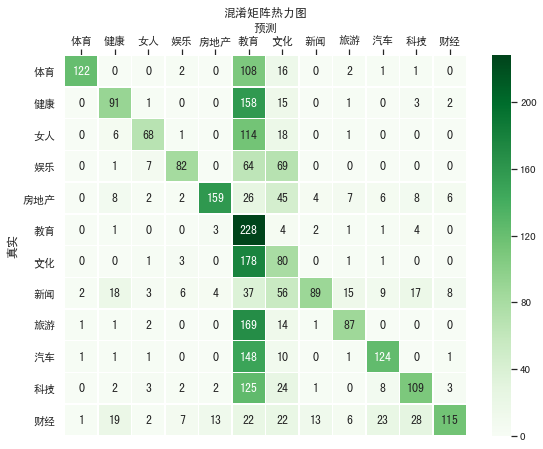

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 7))
## 设置正常显示中文
sns.set(font='SimHei')
## 绘制热力图
ax = sns.heatmap(confusion_matrix(raw_test["分类"].values,Y_test),linewidths=.5,cmap="Greens",
                 annot=True, fmt='d',xticklabels=knn.classes_, yticklabels=knn.classes_)
ax.set_ylabel('真实')
ax.set_xlabel('预测')
ax.xaxis.set_label_position('top') 
ax.xaxis.tick_top()
ax.set_title('混淆矩阵热力图')

这还不是一个完美的新闻主题分类器，这个分类器倾向于将主题预测为"教育"或"文化"。要获得更好的效果，我们可能还需要做很多工作，例如更好的文本预处理和表示，尝试不同的 K 值的效果，甚至利用其它的机器学习算法等。感兴趣的同学可以自己进一步进行尝试。